# This script takes the master_file_metrics.pickle and plots variables of interest

In [5]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [6]:
infile = open("master_file_metrics.pickle", 'rb')
all_metrics_dict = pickle.load(infile)
infile.close()

In [7]:
condition_keys = all_metrics_dict.keys()
all_metrics_keys = all_metrics_dict["G7_GenTegra_65_R59-report_id15"].keys()
print(all_metrics_keys)
print()
all_conditions = [all_metrics_dict[i]['Condition'] for i in all_metrics_dict]
all_conditions = set(all_conditions)
print(all_conditions)

dict_keys(['%DelG', '%DelA', '%DelC', 'Min', '%Sub AtoC', '%Sub AtoG', '%DelT', 'Total Oligos', '%Sub AtoT', 'Run', 'Max', '%InsA', '%InsC', '%InsG', 'Condition', 'Insertion Average', '%Sub GtoT', 'Average', 'Prcnt 0 Reads', '%Sub GtoA', '%Sub TtoC', '%InsT', '%Sub TtoA', '%Sub TtoG', 'Substitution Average', 'Reference', 'Deletion Average', '%Sub CtoT', '%Sub CtoA', '%Sub CtoG', '%Sub GtoC'])

{'BeadsDNAStable', 'Imageneshippingcontrol', 'Trehalose', 'DNAStablePCR', 'GenTegra', 'Imagene', 'Sugars', 'DNAStable', 'Dried', 'Filterpaper'}


In [8]:
print(all_metrics_dict)

{'G7_GenTegra_65_R59-report_id15': {'%DelG': 26.7988, '%DelA': 25.1387, '%DelC': 23.7673, 'Min': 0.0, '%Sub AtoC': 6.6867, '%Sub AtoG': 7.0149, '%DelT': 24.4881, 'Total Oligos': 7373.0, '%Sub AtoT': 4.7897, 'Run': 59, 'Max': 65.0, '%InsA': 22.2168, '%InsC': 19.3388, '%InsG': 39.086, 'Condition': 'GenTegra', 'Insertion Average': 0.0647, '%Sub GtoT': 9.1368, 'Average': 21.51, 'Prcnt 0 Reads': 2.02, '%Sub GtoA': 10.415, '%Sub TtoC': 34.5361, '%InsT': 19.3583, '%Sub TtoA': 5.8602, '%Sub TtoG': 2.9051, 'Substitution Average': 0.5627, 'Reference': 'id15', 'Deletion Average': 0.7379, '%Sub CtoT': 4.5901, '%Sub CtoA': 7.9407, '%Sub CtoG': 2.6193, '%Sub GtoC': 3.16}, 'H1_GenTegra_85_Run54-report_id8': {'%DelG': 23.6527, '%DelA': 28.3771, '%DelC': 27.2942, 'Min': 0.0, '%Sub AtoC': 10.4164, '%Sub AtoG': 5.3073, '%DelT': 21.7765, 'Total Oligos': 21601.0, '%Sub AtoT': 16.0821, 'Run': 54, 'Max': 205.0, '%InsA': 19.9485, '%InsC': 17.1889, '%InsG': 46.2011, 'Condition': 'GenTegra', 'Insertion Average'

In [9]:
tps_days = {'most': [0.0, 2.22, 3.94, 5.94, 13.99, 27.9792], 
 'ETH': [0.0, 7.0, 14.0, 21.0, 28.0, 35.0], 
 'Imagene': [0.0, 2.22, 5.94, 13.99, 27.9792, 34.9792]}

pub_names = {'Trehalose':'Trehalose', 'Sugar Mix':'Sugar Mix', 'Sugars':'Sugar Mix',
             'Filter Paper':'Filter Paper', 'Filterpaper':'Filter Paper',
             'No Additives': 'No Additives', 'Dried': 'No Additives',
             'GenTegra':'GenTegra',
             'DNAStable + PCR':'DNAStable + PCR', 'DNAStablePCR': 'DNAStable + PCR',
             'DNAStable':'DNAStable', 
             'Mag-Bind + DNAStable':'Mag-Bind + DNAStable', 'BeadsDNAStable':'Mag-Bind + DNAStable',
            'ETH_Trehalose':'ETH Trehalose', 'ETH_DNAPure': 'ETH No Additives', 'ETH_Magnetic_NP':'ETH Magnetic NP',
             'ETH_DNA Stable':'ETH DNAStable',
            'Imagene':'Imagene'}

In [10]:
def get_tp(condition_key):
    """Given a condition's key, i.e. "G7_GenTegra_65_R59-report_id15",
    returns the timepoint that condition was in."""
    run_tp = {"62":4, "65":5, "59":3, "60":2, "57":1, "54":0}
    run_extra = condition_key.split('-')[0]
    run = run_extra[-2:]
    return run_tp[run]


def get_tp_days(xs, condition):
    """Given a list of numbers that are the timepoints, and the condition being examined,
    returns a list of the number of days that condition's timepoints correspond to."""
    if 'ETH' in condition:
        return [tps_days['ETH'][i] for i in xs]
    elif 'Imagene' in condition:
        return [tps_days['Imagene'][i] for i in xs]
    else:
        return [tps_days['most'][i] for i in xs] 

def clean_data(y_tuple_list, condition):
    """Given a list like [(int, int), (int, int)], sorts on the second int.
    When the second int is the same, averages the two first numbers together.
    Returns a list of tuples of the first ints (after they've been sorted and averaged) and second ints."""
    #sorts by second item in tuples
    y_tuple_list.sort(key = lambda x:x[1]) 
    
    #if second item is same, averages first items
    averaged_tuples = []
    
    tp0 = []
    tp1 = []
    tp2 = []
    tp3 = []
    tp4 = []
    tp5 = []
    tp_lists = [tp0, tp1, tp2, tp3, tp4, tp5]
    
    xs = []
    
    for i in y_tuple_list:
        if i[1] == 0:
            tp0.append(i[0])
        if i[1] == 1:
            tp1.append(i[0])
        if i[1] == 2:
            tp2.append(i[0])
        if i[1] == 3:
            tp3.append(i[0])
        if i[1] == 4:
            tp4.append(i[0])
        if i[1] == 5:
            tp5.append(i[0])   
    
    avged_tps = []
    y_err = []
    
    for tp in tp_lists:
        if len(tp) > 0:
            avged_tps.append(np.mean(tp))
            y_err.append(stats.sem(tp))
            xs.append(tp_lists.index(tp))
            
    xs = get_tp_days(xs, condition)
    
    return avged_tps, xs, y_err     
    

def plot_metric(condition, metric, title_descriptor):
    """Given a dictionary of all condtitions (condition, temp, run, etc.), 
    the particular condition of interest (i.e. GenTegra),
    and a metric you want to plot against timepoints (i.e. % 0),
    returns a plot with all three temparatures' data present."""

    # get data to plot
        
    # get y data
    y_data_65 = []
    y_data_75 = []
    y_data_85 = []
    
    for c in condition_keys:
        if all_metrics_dict[c]['Condition'] == condition and "Shipping" not in c and "shipping" not in c:
            if all_metrics_dict[c]['Average'] >13: # exclude datapoints with too low coverage
                if '_65_' in c: # checking temperature
                    y_data_65.append((all_metrics_dict[c][metric], get_tp(c)))
                elif '_75_' in c: # checking temperature
                    y_data_75.append((all_metrics_dict[c][metric], get_tp(c)))
                elif '_85_' in c: # checking temperature
                    y_data_85.append((all_metrics_dict[c][metric], get_tp(c)))
    
    # sort y data to play nice with x_data, then only take the x data (avg the two files)
    y_data_65_final, x_data_65_final, y_err_65 = clean_data(y_data_65, condition) 
    y_data_75_final, x_data_75_final, y_err_75 = clean_data(y_data_75, condition)
    y_data_85_final, x_data_85_final, y_err_85 = clean_data(y_data_85, condition)
    print(x_data_65_final)
    
    
    
    ####
    # Plot data
    sns.set
    sns.set_style("whitegrid")
    
    plt.errorbar(x_data_65_final, y_data_65_final, yerr=y_err_65, fmt='o', capsize=10, label='65C')
    plt.errorbar(x_data_75_final, y_data_75_final, yerr=y_err_75, fmt='o', capsize=10, label='75C')
    plt.errorbar(x_data_85_final, y_data_85_final, yerr=y_err_85, fmt='o', capsize=10, label='85C')
    
    plt.xlabel("Time (Days)")
    plt.ylabel(metric)
    title = pub_names[condition] + title_descriptor
    plt.title(title)
    #plt.legend()
    
    #set y-axis upper bound taking error bars into account
    plt.ylim(0, 2.1)
#     all_ys = y_data_65_final + y_data_75_final + y_data_85_final
#     all_errs = y_err_65 + y_err_75 + y_err_85
#     all_combined = [all_ys[i] + all_errs[i] for i in range(len(all_ys))]
#     plt.ylim(0,max(all_combined)*1.1)
    
    plt.legend(loc='upper right')
    
    #plt.savefig(title + '.png', bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close()

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0.0, 2.22, 3.94, 5.94, 13.99]


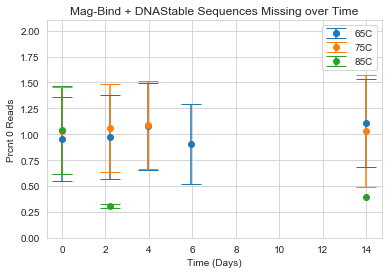

[0.0, 2.22, 3.94, 5.94, 13.99]


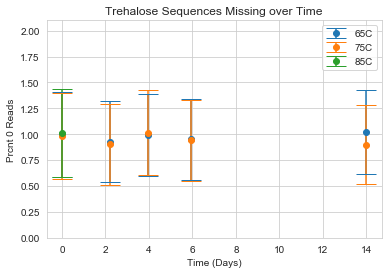

[0.0, 2.22, 3.94, 13.99]


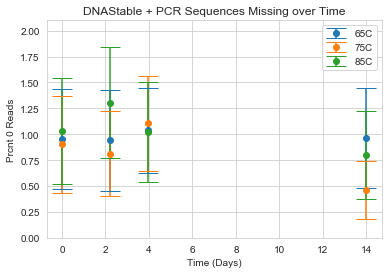

[0.0, 2.22, 3.94, 5.94, 13.99]


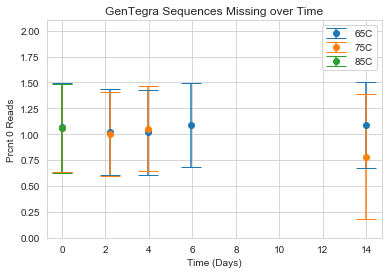

[0.0, 2.22, 5.94, 13.99, 27.9792]


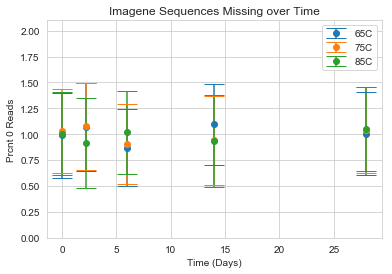

[0.0, 2.22, 3.94, 5.94, 13.99]


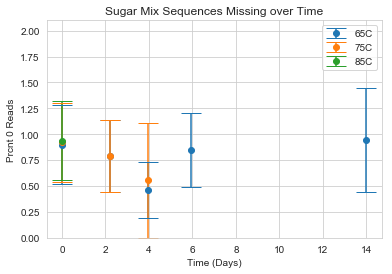

[0.0, 2.22, 3.94, 5.94, 13.99]


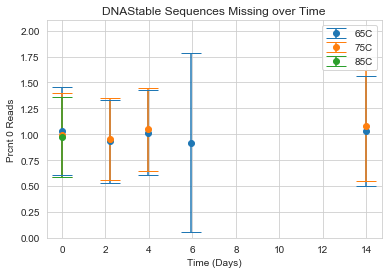

[0.0, 2.22, 13.99]


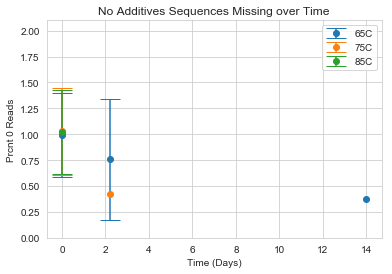

[0.0, 2.22, 3.94, 5.94, 13.99]


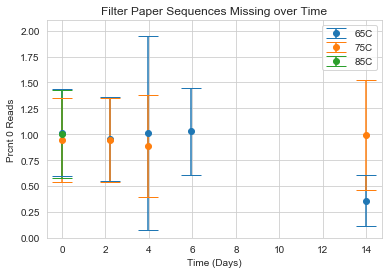

In [11]:
for cond_to_plt in all_conditions:
    if 'hipping' not in cond_to_plt:
        plot_metric(cond_to_plt, 'Prcnt 0 Reads', " Sequences Missing over Time")

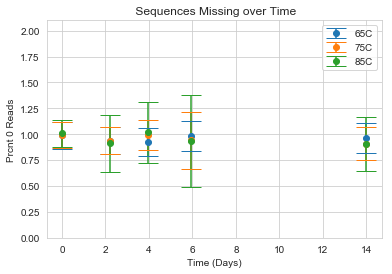

In [25]:
def clean_data_v2(y_tuple_list):
    """Given a list like [(int, int), (int, int)], sorts on the second int.
    When the second int is the same, averages the two first numbers together.
    Returns a list of tuples of the first ints (after they've been sorted and averaged) and second ints."""
    #sorts by second item in tuples
    y_tuple_list.sort(key = lambda x:x[1]) 
    
    #if second item is same, averages first items
    averaged_tuples = []
    
    tp0 = []
    tp1 = []
    tp2 = []
    tp3 = []
    tp4 = []
    tp5 = []
    tp_lists = [tp0, tp1, tp2, tp3, tp4, tp5]
    
    
    for i in y_tuple_list:
        if i[1] == 0:
            tp0.append(i[0])
        if i[1] == 1:
            tp1.append(i[0])
        if i[1] == 2:
            tp2.append(i[0])
        if i[1] == 3:
            tp3.append(i[0])
        if i[1] == 4:
            tp4.append(i[0])
        if i[1] == 5:
            tp5.append(i[0])   
    
    avged_tps = []
    y_err = []
    
    for tp in tp_lists:
        if len(tp) > 0:
            avged_tps.append(np.mean(tp))
            y_err.append(stats.sem(tp))
            
    return avged_tps, y_err     


def plot_all_but_ETH_Imagene_metric(metric, title_descriptor):
    """Given a dictionary of all condtitions (condition, temp, run, etc.), 
    the particular condition of interest (i.e. GenTegra),
    and a metric you want to plot against timepoints (i.e. % 0),
    returns a plot with all three temparatures' data present."""

    # get data to plot
    x_data = [0.0, 2.22, 3.94, 5.94, 13.99]
    
    # get y data
    y_data_65 = []
    y_data_75 = []
    y_data_85 = []
    
    for c in condition_keys:
        if "Shipping" not in c and "shipping" not in c:
            if all_metrics_dict[c]['Average'] >13: # exclude datapoints with too low coverage
                if '_65_' in c: # checking temperature
                    y_data_65.append((all_metrics_dict[c][metric], get_tp(c)))
                elif '_75_' in c: # checking temperature
                    y_data_75.append((all_metrics_dict[c][metric], get_tp(c)))
                elif '_85_' in c: # checking temperature
                    y_data_85.append((all_metrics_dict[c][metric], get_tp(c)))
    
    # sort y data to play nice with x_data, then only take the x data (avg the two files)
    y_data_65_final, y_err_65 = clean_data_v2(y_data_65) 
    y_data_75_final, y_err_75 = clean_data_v2(y_data_75)
    y_data_85_final, y_err_85 = clean_data_v2(y_data_85)
    
    
    
    ####
    # Plot data
    sns.set
    sns.set_style("whitegrid")
    a = 1
    plt.errorbar(x_data, y_data_65_final, yerr=y_err_65, fmt='o', capsize=10, label='65C', alpha=a)
    plt.errorbar(x_data, y_data_75_final, yerr=y_err_75, fmt='o', capsize=10, label='75C', alpha=a)
    plt.errorbar(x_data, y_data_85_final, yerr=y_err_85, fmt='o', capsize=10, label='85C', alpha=a)
    
    plt.xlabel("Time (Days)")
    plt.ylabel(metric)
    title = title_descriptor
    plt.title(title)
    #plt.legend()
    
    #set y-axis upper bound taking error bars into account
    plt.ylim(0, 2.1)
#     all_ys = y_data_65_final + y_data_75_final + y_data_85_final
#     all_errs = y_err_65 + y_err_75 + y_err_85
#     all_combined = [all_ys[i] + all_errs[i] for i in range(len(all_ys))]
#     plt.ylim(0,max(all_combined)*1.1)
    
    plt.legend(loc='upper right')
    
    #plt.savefig("All" + title + '.png', bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close()
    
plot_all_but_ETH_Imagene_metric('Prcnt 0 Reads', " Sequences Missing over Time")